# Import MAT$^2$ & loading data

Import MAT$^2$ and Python packages needed for visualization.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from MAT2 import *

Welcome to MAT2!


MAT$^2$ receives pandas DataFrame as input data.

Multiple batches of data are concated into a matrix of size **gene_num $\times$ cell_num**.

In [2]:
data = pd.read_csv('data.csv', header=0, index_col=0)
data

,cell 1,cell 2,cell 3,cell 4,cell 5,cell 6,cell 7,cell 8,cell 9,cell 10,...,cell 5984,cell 5985,cell 5986,cell 5987,cell 5988,cell 5989,cell 5990,cell 5991,cell 5992,cell 5993
CLPS,149.077200,1.001958,1.001958,2.007853,0.000000,1.001958,5.049473,14.397368,9.162012,8.127667,...,0,0,0,0,0,0,0,0,0,0
CELA3A,616.878907,143.762131,8.127667,6.071431,17.590756,2.007853,7.097484,270.474515,64.479391,42.311703,...,0,0,0,0,0,0,0,0,0,0
GP2,171.514911,55.629127,3.017717,1.001958,4.031579,3.017717,1.001958,163.815082,6.071431,2.007853,...,0,0,0,0,0,0,0,0,0,0
PPY,16.521861,9.162012,4.031579,10.200553,10.200553,13.341696,1.001958,5.049473,3.017717,3.017717,...,45141,28569,45468,30169,15643,28182,14357,39548,44670,41552
CPB1,475.212286,24.099582,48.279339,7.097484,12.290360,4.031579,41.134690,331.950644,58.126707,90.168472,...,0,0,0,17,0,21,168,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,25,47,12,31,20,0,0,3,52
PRSS37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
PTPN14,0.000000,0.000000,3.017717,0.000000,0.000000,0.000000,0.000000,2.007853,1.001958,3.017717,...,0,0,0,0,0,0,0,0,0,0
DOK4,1.001958,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,1.001958,1.001958,2.007853,...,0,7,0,15,0,37,0,19,32,9


The row name of metadata should correspond to the cell name in data.

Metadata must contain the **batch** column, and must also contain the **type** column when supervised.

In [3]:
metadata = pd.read_csv('metadata.csv', header=0, index_col=0)
metadata

,type,batch
cell 1,acinar,celseq
cell 2,acinar,celseq
cell 3,acinar,celseq
cell 4,acinar,celseq
cell 5,acinar,celseq
...,...,...
cell 5989,gamma,smartseq2
cell 5990,gamma,smartseq2
cell 5991,gamma,smartseq2
cell 5992,gamma,smartseq2


Anchor needs to be loaded only in unsupervised situations.

Each record contains two cell numbers ( cell $\in$ $[0,cell\_num-1]$) and a score ( score $\in$ $[0.0,1.0]$).

In [4]:
anchor = pd.read_csv('anchor.csv', header=0, index_col=0)
anchor

,cell1,cell2,score
1,9,975,0.516129
2,21,975,0.451613
3,47,975,0.387097
4,171,975,0.451613
5,204,975,0.580645
...,...,...,...
65574,5989,3702,0.571429
65575,5991,3688,0.785714
65576,5992,3698,0.821429
65577,5992,3699,1.000000


Define a function for plotting.

In [5]:
def plot_tsne(tsne):
    _, axes = plt.subplots(1, 2, figsize=(20, 10))
    classes, uni_class = pd.factorize(metadata['type'])
    cmap1 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_class)))
    for i, class_i in enumerate(uni_class):
        cell_list = np.where(classes == i)
        axes[0].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=class_i, color=cmap1[i,:], s=5)
    batches, uni_batch = pd.factorize(metadata['batch'])
    cmap2 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_batch)))
    for i, batch_i in enumerate(uni_batch):
        cell_list = np.where(batches == i)
        axes[1].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=batch_i, color=cmap2[i,:], s=5)
    axes[0].legend(), axes[1].legend()
    axes[0].set_title('Colored by cell type')
    axes[1].set_title('Colored by batch')
    plt.show()

Visualization for original datasets.

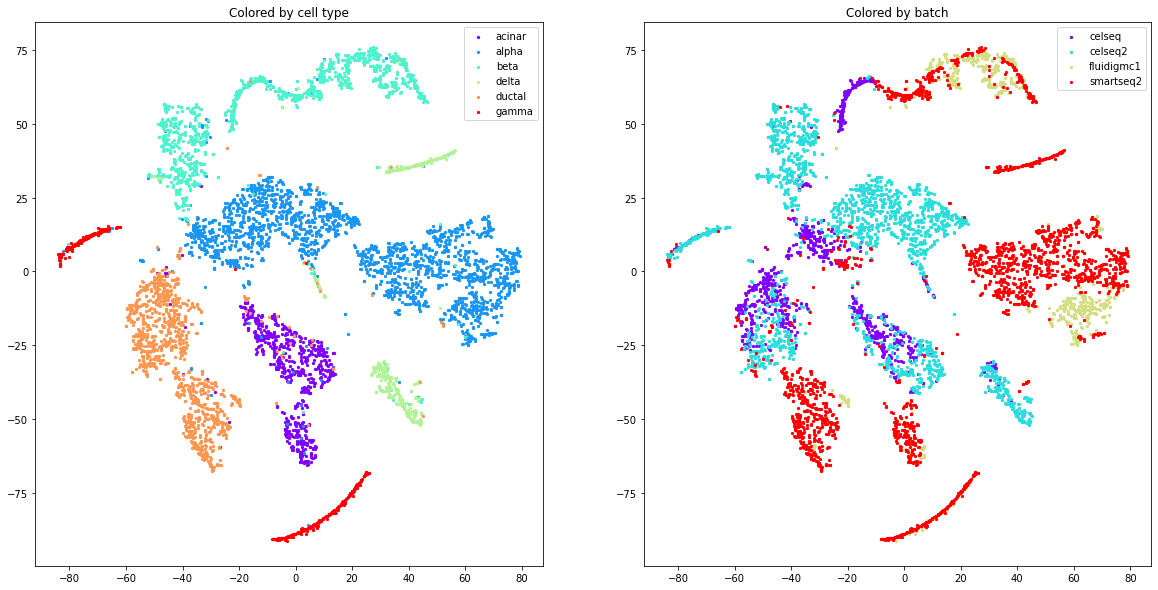

In [6]:
data_pca = PCA(n_components=50).fit_transform(data.T)
data_tsne = TSNE(n_components=2).fit_transform(data_pca)
plot_tsne(data_tsne)

# Supervised model

In [7]:
model = BuildMAT2(
    data=data,
    metadata=metadata,
    num_workers=2,
    use_gpu=True,
    mode='supervised',
    dropout_rate=0.3)
model.train(epochs=30)

Stage 1: [ 030 / 030 ]  13.36 sec(s) | ############################## | Train Loss: 0.012401

Stage 2: [ 030 / 030 ]  14.78 sec(s) | ############################## | Train Loss: 135.221207
Training finish!



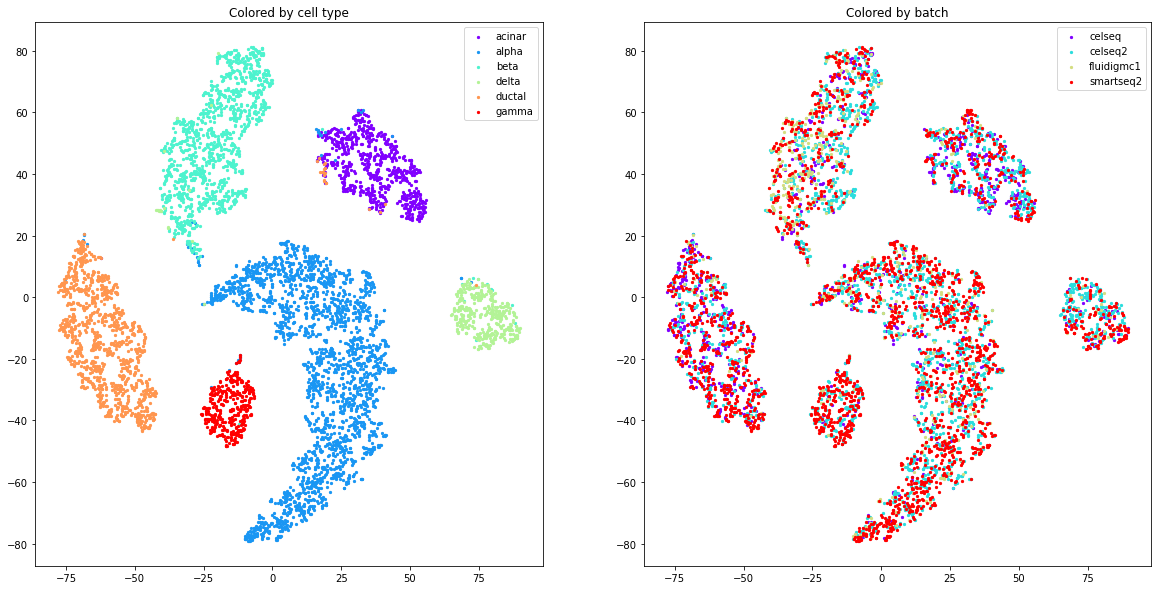

In [8]:
rec = model.evaluate(data)
rec_pca = PCA(n_components=50).fit_transform(rec)
rec_tsne = TSNE(n_components=2).fit_transform(rec_pca)
plot_tsne(rec_tsne)

# Unsupervised model

In [9]:
model = BuildMAT2(
    data=data,
    metadata=metadata,
    anchor=anchor,
    num_workers=2,
    use_gpu=True,
    mode='manual')
model.train(epochs=30)

Stage 1: [ 030 / 030 ]  13.14 sec(s) | ############################## | Train Loss: 0.064790

Stage 2: [ 030 / 030 ]  14.88 sec(s) | ############################## | Train Loss: 139.920212
Training finish!



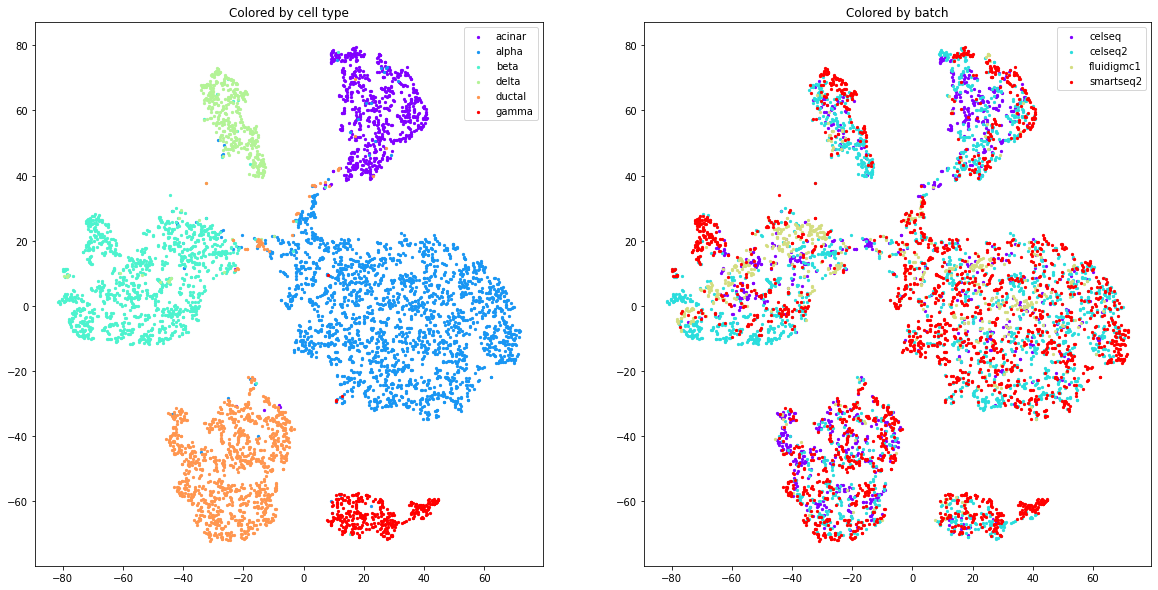

In [10]:
rec = model.evaluate(data)
rec_pca = PCA(n_components=50).fit_transform(rec)
rec_tsne = TSNE(n_components=2).fit_transform(rec_pca)
plot_tsne(rec_tsne)

# Semi-supervised model
When some cells have been annotated, but the rest of the cells are not annotated.

In [11]:
# Remove 80% cell type annotations for testing.
test_meta = metadata.copy()
test_meta['type'][np.random.randint(0, len(metadata), int(len(metadata) * 0.8))] = ''
test_meta

,type,batch,cluster
cell 1,,celseq,celseq
cell 2,,celseq,celseq
cell 3,acinar,celseq,celseq
cell 4,,celseq,celseq
cell 5,acinar,celseq,celseq
...,...,...,...
cell 5989,,smartseq2,smartseq2
cell 5990,,smartseq2,smartseq2
cell 5991,gamma,smartseq2,smartseq2
cell 5992,,smartseq2,smartseq2


In [12]:
model = BuildMAT2(
    data=data,
    metadata=test_meta,
    anchor=anchor,
    num_workers=2,
    use_gpu=True,
    mode='semi-supervised')
model.train(epochs=30)

Stage 1: [ 030 / 030 ]  12.97 sec(s) | ############################## | Train Loss: 0.139566

Stage 2: [ 030 / 030 ]  14.71 sec(s) | ############################## | Train Loss: 159.541397
Training finish!



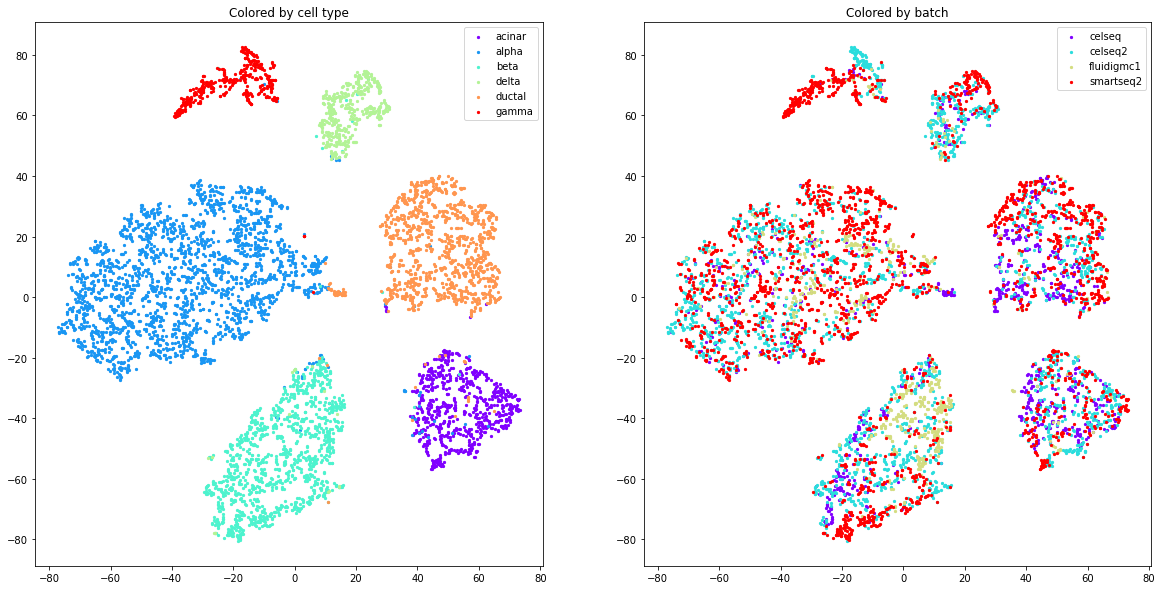

In [13]:
rec = model.evaluate(data)
rec_pca = PCA(n_components=50).fit_transform(rec)
rec_tsne = TSNE(n_components=2).fit_transform(rec_pca)
plot_tsne(rec_tsne)